### Naive Bayes Classification of Text Documents.


The Confusion Matrix for the Naive Bayes Classifier



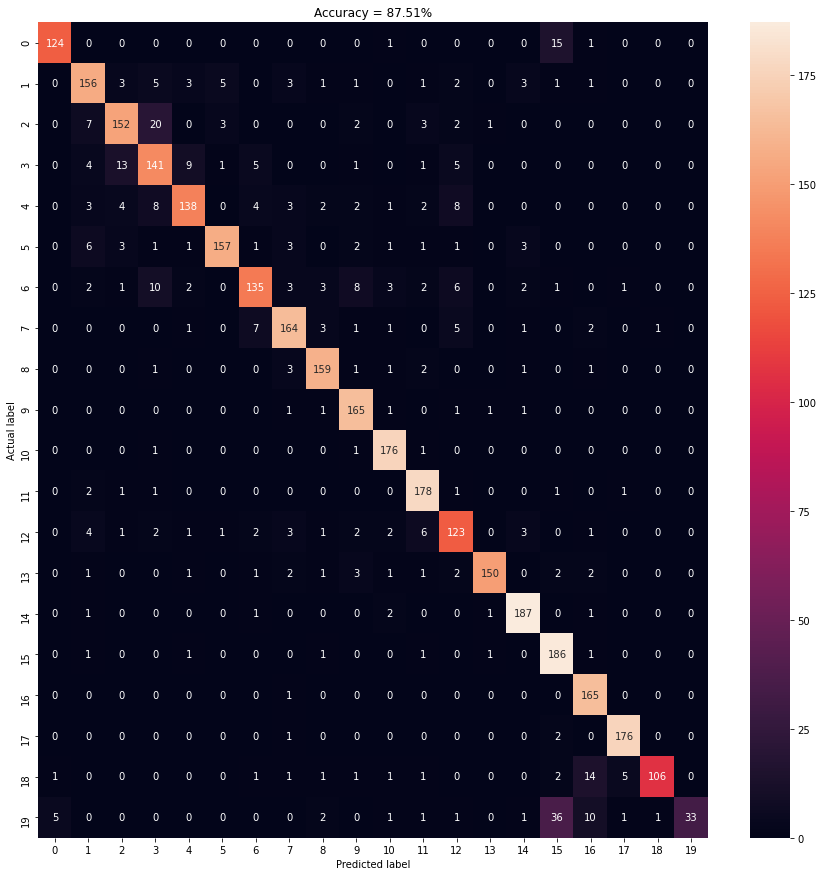


The Classification Report for the Naive Bayes Classifier

               precision    recall  f1-score   support

           0       0.95      0.88      0.92       141
           1       0.83      0.84      0.84       185
           2       0.85      0.80      0.83       190
           3       0.74      0.78      0.76       180
           4       0.88      0.79      0.83       175
           5       0.94      0.87      0.90       180
           6       0.86      0.75      0.80       179
           7       0.87      0.88      0.88       186
           8       0.91      0.94      0.92       169
           9       0.87      0.96      0.91       171
          10       0.92      0.98      0.95       179
          11       0.89      0.96      0.92       185
          12       0.78      0.81      0.80       152
          13       0.97      0.90      0.93       167
          14       0.93      0.97      0.95       193
          15       0.76      0.97      0.85       192
          16       0.

In [13]:
from sklearn.datasets import fetch_20newsgroups  #importing 20newsgroup data
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Import Dataset
dataset = fetch_20newsgroups(subset='train', shuffle=True)
labels = dataset.target

# Creating TF/IDF Vectors from Text
vectorizer = TfidfVectorizer(stop_words='english',) 
X = vectorizer.fit_transform(dataset.data)

# Splitting the Dataset into Training and Testing Set
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size=0.3) 

# Build the Naive Bayes Model
mnb = MultinomialNB()

# Train the Model 
mnb.fit(X_train,y_train)

# Prediction of Class using Trained Model
y_pred = mnb.predict(X_test)

# Output: The Confusion Matrix and Classification Report
print("\nThe Confusion Matrix for the Naive Bayes Classifier\n")
fig, ax = plt.subplots(figsize=(15, 15))
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True, ax=ax, fmt='g')
plt.title('Accuracy = {0:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nThe Classification Report for the Naive Bayes Classifier\n\n"
      ,metrics.classification_report(y_test, y_pred))